# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
%matplotlib inline

# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
country = []

# Loop through cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        results = (response['name'])
        print(f"Retrieving Results for" + results)
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results forJamestown
------------
Retrieving Results forEsperance
------------
Missing field/result... skipping.
------------
Retrieving Results forUshuaia
------------
Retrieving Results forArraial do Cabo
------------
Retrieving Results forHermanus
------------
Retrieving Results forMarabu
------------
Retrieving Results forMogadishu
------------
Missing field/result... skipping.
------------
Retrieving Results forRoald
------------
Retrieving Results forMoïssala
------------
Retrieving Results forCoolum Beach
------------
Retrieving Results forLeningradskiy
------------
Retrieving Results forBarrow
------------
Retrieving Results forPevek
------------
Missing field/result... skipping.
------------
Retrieving Results forTouros
------------
Retrieving Results forChekhov
------------
Retrieving Results forLebu
------------
Retrieving Results forSevero-Kuril'sk
------------
Retrieving Results forRikitea
------------
Retrieving Results forTuktoyaktuk
------------
Retrieving Re

Retrieving Results forSkibbereen
------------
Retrieving Results forTigil'
------------
Retrieving Results forPuerto Ayora
------------
Retrieving Results forBlack River
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving Results forCiudad Bolivar
------------
Retrieving Results forShima
------------
Retrieving Results forSão Francisco de Assis
------------
Retrieving Results forSaint George
------------
Retrieving Results forCidreira
------------
Retrieving Results forÇorum Province
------------
Retrieving Results forTiksi
------------
Retrieving Results forCam Ranh
------------
Retrieving Results forAlamada
------------
Retrieving Results forMuisne
------------
Retrieving Results forAncud
------------
Retrieving Results forAykhal
------------
Retrieving Results forBafia
------------
Retrieving Results forKisaran
------------
Retrieving Results forAmbulu
------------
Retrieving Results forRío Gallegos
------------
Retri

Retrieving Results forMuskegon
------------
Retrieving Results forGoderich
------------
Retrieving Results forBengkulu
------------
Retrieving Results forBelyy Yar
------------
Retrieving Results forSulangan
------------
Retrieving Results forBagaces
------------
Retrieving Results forTromsø
------------
Retrieving Results forChunhuhub
------------
Retrieving Results forMeulaboh
------------
Retrieving Results forLusambo
------------
Retrieving Results forMamakan
------------
Retrieving Results forUpernavik
------------
Retrieving Results forLa Santisima Trinidad
------------
Retrieving Results forDiébougou
------------
Retrieving Results forThunder Bay
------------
Retrieving Results forNorden
------------
Retrieving Results forVaasa
------------
Retrieving Results forManingrida
------------
Retrieving Results forQaqortoq
------------
Missing field/result... skipping.
------------
Retrieving Results forLa Cruz
------------
Retrieving Results forKetchikan
------------
Retrieving Result

Retrieving Results forDimāpur
------------
Retrieving Results forBrownfield
------------
Retrieving Results forAdwa
------------
Retrieving Results forStephenville Crossing
------------
Retrieving Results forCanindé
------------
Retrieving Results forPanama City
------------
Retrieving Results forPayo
------------
Retrieving Results forIlawe
------------
Retrieving Results forSanta Rosa
------------
Retrieving Results forOkhotsk
------------
Retrieving Results forJennings
------------
Retrieving Results forPacet
------------
Retrieving Results forSikandra Rao
------------
Retrieving Results forSaint Anthony
------------
Retrieving Results forAmapá
------------
Retrieving Results forNoumea
------------
Retrieving Results forChebarkul'
------------
Retrieving Results forFarmington
------------
Retrieving Results forTe Anau
------------
Retrieving Results forLabuhan
------------
Retrieving Results forTerre Haute
------------
Missing field/result... skipping.
------------
Retrieving Result

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Create a Dictionary
Raw_data = {"City":name,"Latitude": lat,"Longitude": lng, "Temperature": temp, "Humidity":humid, "Cloudiness": clouds,
           "Wind Speed": wind, "Country": country}
#Convert Dictionary to DataFrame
Weather_Results_df = pd.DataFrame(Raw_data)
#Write DataFrame to CSV file "cities.csv"
Weather_Results_df.to_csv(output_data_file)
Weather_Results_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,Jamestown,42.10,-79.24,43.00,51,90,10.29,US
1,Esperance,-33.87,121.90,66.20,52,40,18.34,AU
2,Ushuaia,-54.80,-68.30,41.00,80,75,16.11,AR
3,Arraial do Cabo,-22.97,-42.03,72.84,93,95,1.86,BR
4,Hermanus,-34.42,19.23,59.00,84,96,3.20,ZA


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

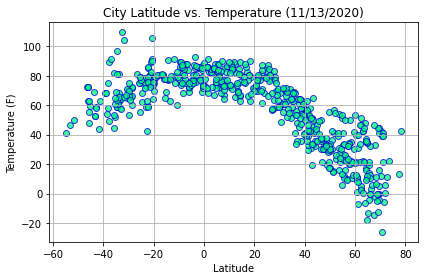

In [16]:
#Temperature (F) vs. Latitude

x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Temperature"]
plt.title("City Latitude vs. Temperature (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "springgreen", edgecolors="mediumblue", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig1.png")


This plot shows correlation of the cities with the higher temperatures and being closest to the equator

## Latitude vs. Humidity Plot

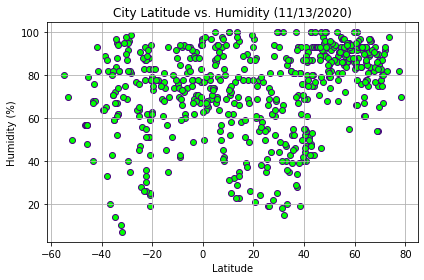

In [17]:
#Humidity (%) vs. Latitude
x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Humidity"]
plt.title("City Latitude vs. Humidity (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "lime", edgecolors="indigo")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig2.png")

This plot analyzing the humidity of cities shows that cities between 50 and 80 latitude have higher humidity 

## Latitude vs. Cloudiness Plot

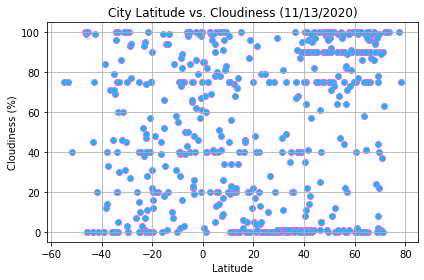

In [18]:
#Cloudiness (%) vs. Latitude
x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "deepskyblue", edgecolors="orchid")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig3.png")

this plot analyzing the cloudiness and latitude shows there is no correlation between the two

## Latitude vs. Wind Speed Plot

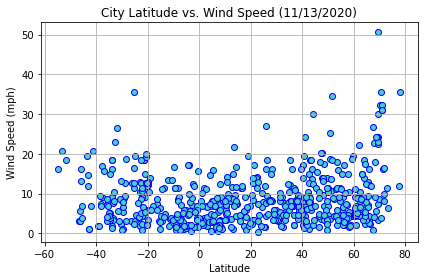

In [19]:
#Wind Speed (mph) vs. Latitude
x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "mediumturquoise", edgecolors="blue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig4.png")

this plot analyzing the correlation between wind speed and latitude shows very little correlation

## Linear Regression

In [20]:
Northern_hemisphere_df = Weather_Results_df.loc[Weather_Results_df["Latitude"]>=0]
Southern_hemisphere_df = Weather_Results_df.loc[Weather_Results_df["Latitude"]<0]
#print(type(Southern_hemisphere_df))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.763067126160394


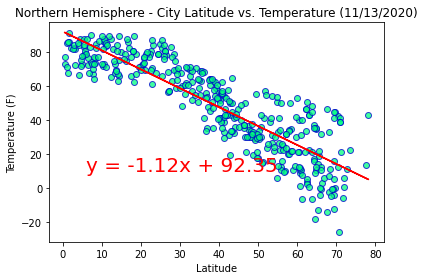

In [21]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Temperature (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "springgreen", edgecolors="mediumblue", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.tight_layout()
print(f"R squared: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

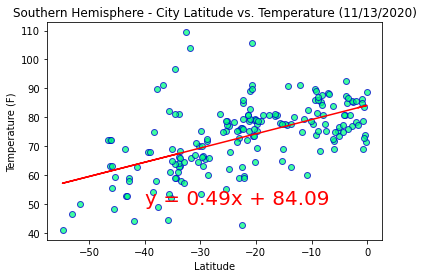

In [22]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Temperature (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "springgreen", edgecolors="mediumblue", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.show()

Definite correlation between latitude and temperature in both Northern and Southern hemispheres, however you can see the linear regression changes angles between the Northern and Southern and seems there are much higher temperatures in the Southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

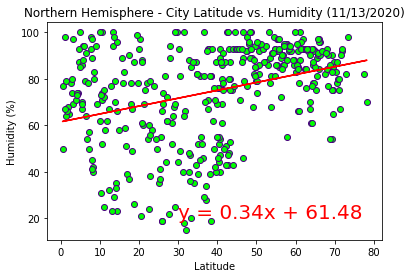

In [23]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Humidity (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "lime", edgecolors="indigo")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

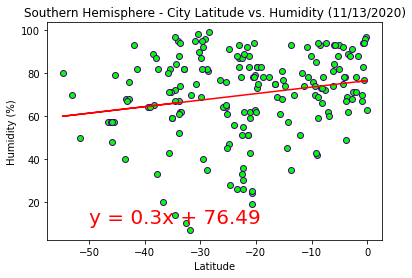

In [24]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Humidity (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "lime", edgecolors="indigo")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()

There is correlation between humidity and latitude and these plots show that in both the Northern and Southern hemispheres, the further towards 90 degrees latitude you go there tends to be higher humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

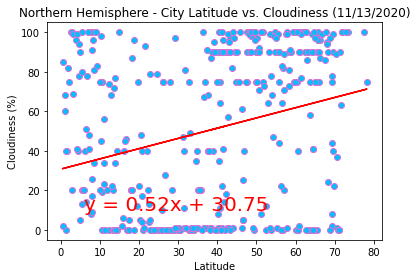

In [25]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "deepskyblue", edgecolors="orchid")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

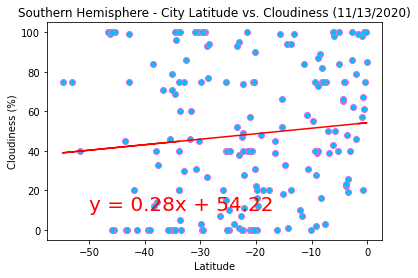

In [26]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "deepskyblue", edgecolors="orchid")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

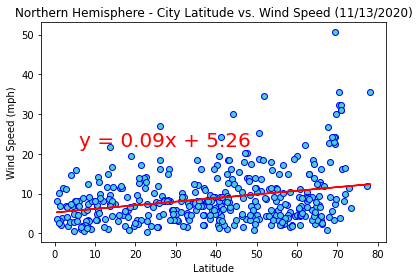

In [27]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,22),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "mediumturquoise", edgecolors="blue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

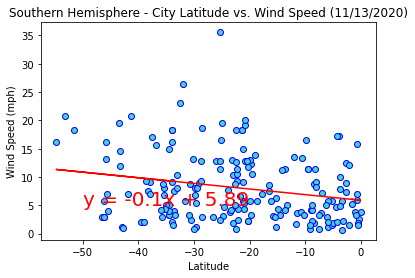

In [28]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "mediumturquoise", edgecolors="blue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()